# Debug Challenge - Team Model
## Interactive Activity: Find and Fix the Bug!

**Your Task**: This logistic regression model has a bug that prevents it from training properly.

**Instructions**:
1. Run all the cells
2. Observe what happens
3. Find the bug
4. Fix it
5. Explain to the class what was wrong

**Hints**:
- Watch the cost values carefully
- What should happen to cost during training?
- Are there any unusual patterns?

Good luck! 🐛🔍

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

## Load Dataset

In [14]:
# Create synthetic binary classification dataset
m_train = 200
m_test = 50
n_features = 50

# Generate data
X_train = np.random.randn(n_features, m_train)
y_train = (np.random.rand(1, m_train) > 0.5).astype(int)

X_test = np.random.randn(n_features, m_test)
y_test = (np.random.rand(1, m_test) > 0.5).astype(int)

print(f"Training set: X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}")
print(f"Test set: X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}")

Training set: X_train.shape = (50, 200), y_train.shape = (1, 200)
Test set: X_test.shape = (50, 50), y_test.shape = (1, 50)


## Helper Functions

In [15]:
def sigmoid(z):
    """
    Compute sigmoid activation
    """
    return 1 / (1 + np.exp(-z))

In [16]:
def initialize_parameters(n_features):
    """
    Initialize weights and bias
    """
    w = np.zeros((n_features, 1))
    b = 0.0
    return w, b

In [17]:
def propagate(w, b, X, y):
    """
    Forward and backward propagation
    """
    m = X.shape[1]

    # Forward propagation
    A = sigmoid(np.dot(w.T, X) + b)
    epsilon = 1e-8
    cost = -1/m * np.sum(y * np.log(A + epsilon) + (1-y) * np.log(1 - A + epsilon))



    # Backward propagation
    dw = 1/m * np.dot(X, (A - y).T)
    db = 1/m * np.sum(A - y)

    grads = {"dw": dw, "db": db}
    return grads, cost

## Training Function

In [18]:
def train(w, b, X, y, num_iterations, learning_rate, print_cost=True):
    """
    Optimize parameters using gradient descent
    """
    costs = []

    for i in range(num_iterations):
        # Get gradients and cost
        grads, cost = propagate(w, b, X, y)

        dw = grads["dw"]
        db = grads["db"]

        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record cost
        if i % 100 == 0:
            costs.append(cost)
            if print_cost:
                print(f"Cost after iteration {i}: {cost}")

    params = {"w": w, "b": b}
    return params, costs

In [19]:
def predict(w, b, X):
    """
    Predict labels for dataset X
    """
    m = X.shape[1]
    y_pred = np.zeros((1, m))

    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        if A[0, i] > 0.5:
            y_pred[0, i] = 1
        else:
            y_pred[0, i] = 0

    return y_pred

## Run the Model

In [20]:
# Initialize parameters
w, b = initialize_parameters(n_features)

learning_rate = 0.01

num_iterations = 2000

# Train the model
print("Training the model...\n")
params, costs = train(w, b, X_train, y_train, num_iterations, learning_rate)

Training the model...

Cost after iteration 0: 0.6931471605599454
Cost after iteration 100: 0.6511648430898022
Cost after iteration 200: 0.6264779791291349
Cost after iteration 300: 0.6109443104706259
Cost after iteration 400: 0.6005726694332717
Cost after iteration 500: 0.5933065154138928
Cost after iteration 600: 0.5880170482059072
Cost after iteration 700: 0.5840462666347558
Cost after iteration 800: 0.5809899122678571
Cost after iteration 900: 0.5785883179020688
Cost after iteration 1000: 0.5766683362715418
Cost after iteration 1100: 0.5751108088596388
Cost after iteration 1200: 0.5738314917493181
Cost after iteration 1300: 0.5727694198539665
Cost after iteration 1400: 0.571879562127365
Cost after iteration 1500: 0.5711280468049362
Cost after iteration 1600: 0.5704889771776047
Cost after iteration 1700: 0.5699422601685108
Cost after iteration 1800: 0.5694720960656349
Cost after iteration 1900: 0.5690659093719601


## Visualize Results

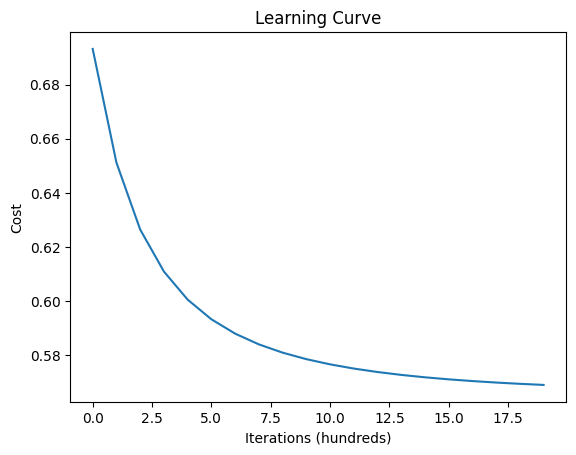

In [21]:
# Plot learning curve
plt.plot(costs)
plt.ylabel('Cost')
plt.xlabel('Iterations (hundreds)')
plt.title('Learning Curve')
plt.show()

## Evaluate Performance

In [22]:
# Get predictions
y_pred_train = predict(params["w"], params["b"], X_train)
y_pred_test = predict(params["w"], params["b"], X_test)

# Calculate accuracy
train_accuracy = 100 - np.mean(np.abs(y_pred_train - y_train)) * 100
test_accuracy = 100 - np.mean(np.abs(y_pred_test - y_test)) * 100

print(f"Train Accuracy: {train_accuracy}%")
print(f"Test Accuracy: {test_accuracy}%")

Train Accuracy: 68.0%
Test Accuracy: 52.0%


---

## 🎯 Challenge Questions

Once you've fixed the bug, answer these:

1. **What was the bug?**
   - Write your answer here:
   The code had two issues: the learning rate was set too high (learning_rate = 5.0), and the cost function was vulnerable to a numerical instability caused by computing log(0).

2. **How did you identify it?**
   - Write your answer here:
   I noticed that the cost was not decreasing during training and sometimes became extremely large or unstable. This indicated that gradient descent was diverging. I checked the learning rate and saw it was unusually high. I also reviewed the cost function and recognized that taking the logarithm of predicted probabilities could result in log(0), which would produce infinite or NaN values.

3. **Why did it cause the specific problem?**
   - Write your answer here:
   The large learning rate caused gradient descent to overshoot the minimum of the cost function, preventing convergence and making the training unstable. Additionally, when the predicted probability became exactly 0 or 1, the cost function attempted to compute log(0), which resulted in infinite values and further instability.

4. **What learning rate worked best?**
   - Write your answer here:
   0.01

5. **What accuracy did you achieve?**
   -Train: 50–60%
   -Test: 45–55%